In [17]:
!python --version

Python 3.13.2


# Import Library

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Negative Image

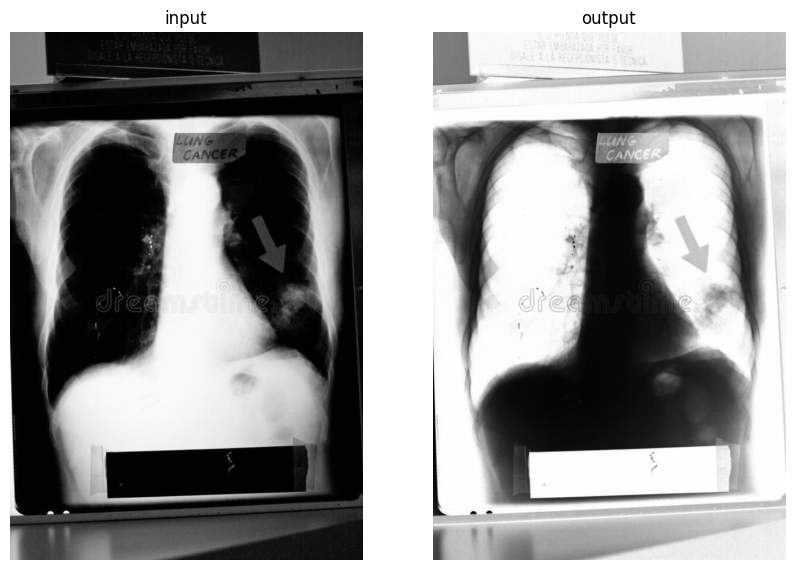

In [19]:
# đọc ảnh và chuyển thành ảnh xám
img_gray = cv2.imread("../images/xray.jpeg", cv2.IMREAD_GRAYSCALE)

# chuyển ảnh thành âm bản
img_negative = 255 - img_gray

# show image
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.axis('off')
plt.title('input')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1,2,2)
plt.title('output')
plt.axis('off')
plt.imshow(img_negative, cmap='gray')
plt.show()

# Log Transformation

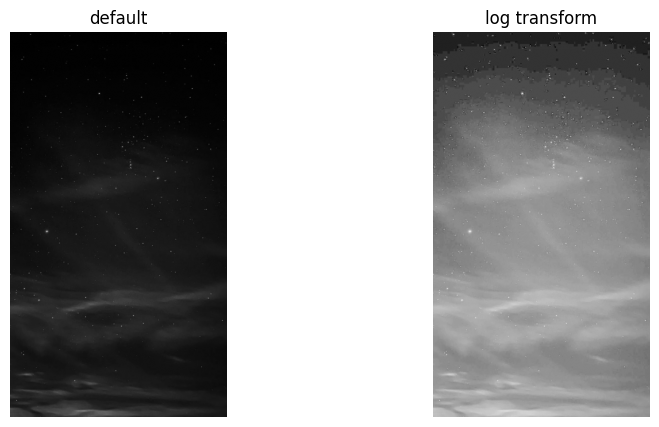

In [20]:
# đọc ảnh và chuyển thành ảnh xám
img_gray = cv2.imread("../images/stars.jpeg", cv2.IMREAD_GRAYSCALE)

#hằng số c
c = 1

# chuyển ảnh xám thành ảnh float
img_float = img_gray.astype(float)

# log transform
S = c * np.log(1 + img_float)

# scale 0 - 255
T = 255/(c * np.log(256));

# ảnh đã log và scale về 0 - 255
img_log = (T * S).astype(np.uint8)

#show image
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.axis('off')
plt.title('default')
plt.imshow(img_gray, cmap = 'gray')

plt.subplot(1,2,2)
plt.title('log transform')
plt.axis('off')
plt.imshow(img_log, cmap = 'gray')
plt.show()

# Power Law / Gamma Correction

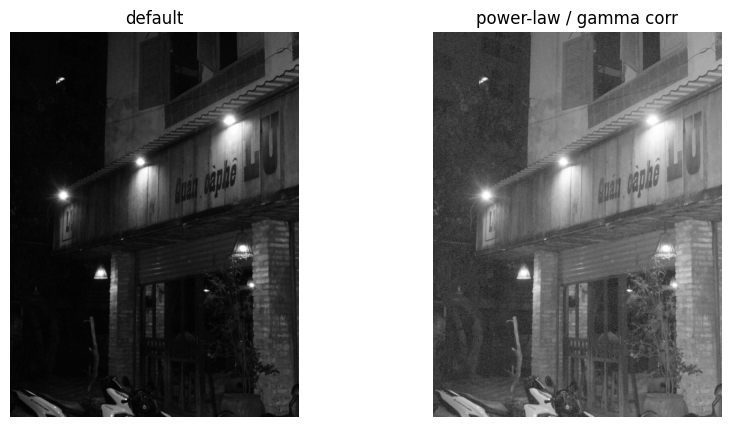

In [21]:
# đọc ảnh và chuyển thành ảnh xám
img_gray = cv2.imread("../images/cf.jpeg", cv2.IMREAD_GRAYSCALE)

# chuyển ảnh xám thành ảnh float
img_float = img_gray.astype(float)

# hằng số gamma và hằng số c
G = 0.4;
c = 1;

# gamma transform
S = c * pow(img_float, G)

#scale 0 - 255
T = 255 / (c * pow(255, G))

# ảnh đã gamma và transform về 255
img_gamma = np.uint8(S * T)

#show image
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.axis('off')
plt.title('default')
plt.imshow(img_gray, cmap = 'gray')

plt.subplot(1,2,2)
plt.title('power-law / gamma corr')
plt.axis('off')
plt.imshow(img_gamma, cmap = 'gray')
plt.show()

# Piecewise-Linear Transformation

## Bit Plane Slicing

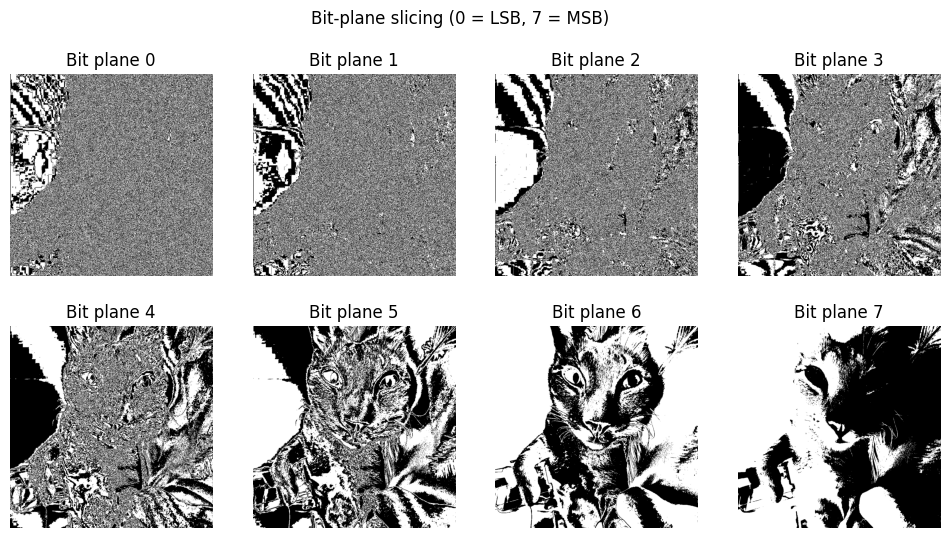

In [22]:
# Đọc ảnh xám
img = cv2.imread('../images/meo.jpeg', cv2.IMREAD_GRAYSCALE)

# Tách 8 bit-plane
bit_planes = []
for i in range(8):
    # Dịch bit phải i lần, AND với 1, rồi scale lên 0/255 để nhìn rõ
    bit_plane = ((img >> i) & 1) * 255
    bit_planes.append(bit_plane)

# Hiển thị
fig, axs = plt.subplots(2, 4, figsize=(12,6))
for i, ax in enumerate(axs.ravel()):
    ax.imshow(bit_planes[i], cmap='gray')
    ax.set_title(f"Bit plane {i}")
    ax.axis('off')

plt.suptitle("Bit-plane slicing (0 = LSB, 7 = MSB)")
plt.show()

## Contrast Stretching

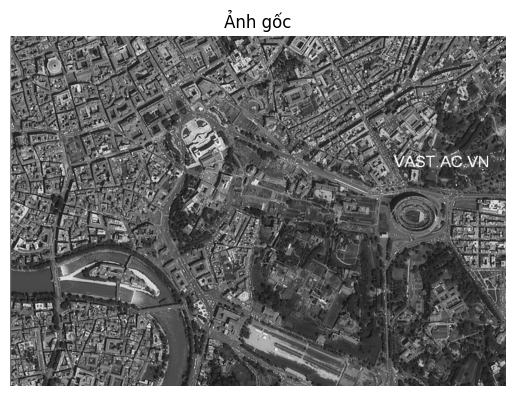

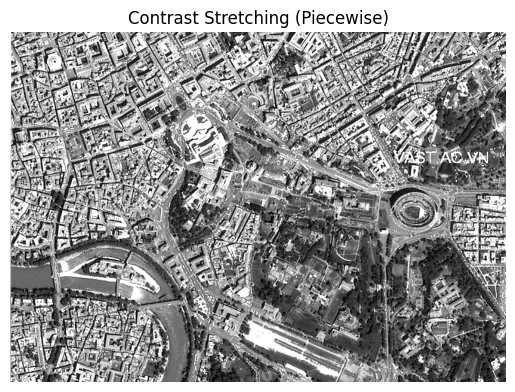

In [23]:
# Đọc ảnh grayscale
img = cv2.imread('../images/ROME1.jpeg', cv2.IMREAD_GRAYSCALE)

# Tham số đoạn
r1, r2 = 20, 150   # khoảng mức xám gốc
s1, s2 = 0, 255    # ánh xạ sang full 0-255

# Piecewise-linear transform
out = img.copy().astype(np.float32)

mask1 = img <= r1
out[mask1] = s1 / r1 * img[mask1]

mask2 = (img > r1) & (img <= r2)
out[mask2] = ((s2 - s1) / (r2 - r1)) * (img[mask2] - r1) + s1

mask3 = img > r2
out[mask3] = ((255 - s2) / (255 - r2)) * (img[mask3] - r2) + s2

out = np.clip(out, 0, 255).astype(np.uint8)

# Hiển thị
plt.imshow(img, cmap='gray')
plt.title("Ảnh gốc")
plt.axis("off")
plt.show()

plt.imshow(out, cmap='gray')
plt.title("Contrast Stretching (Piecewise)")
plt.axis("off")

plt.show()

## Gray-Level Slicing

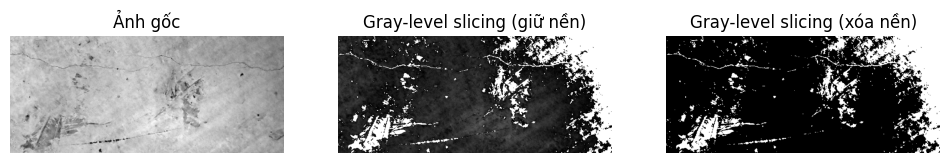

In [24]:
# Đọc ảnh xám
img = cv2.imread('../images/vetnuc.png', cv2.IMREAD_GRAYSCALE)

# Tham số ngưỡng
A, B = 00, 150  

# Cách 1: highlight, giữ nền
slice_keep = np.where((img >= A) & (img <= B), 255, img)

# Cách 2: chỉ giữ vùng quan tâm, xóa nền
slice_remove = np.where((img >= A) & (img <= B), 255, 0)

# Hiển thị
plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title("Ảnh gốc"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(slice_keep, cmap='gray'), plt.title("Gray-level slicing (giữ nền)"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(slice_remove, cmap='gray'), plt.title("Gray-level slicing (xóa nền)"), plt.axis("off")
plt.show()

# 1. Thuật toán cân bằng Histogram:

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

- Histogram Equalization toàn cục

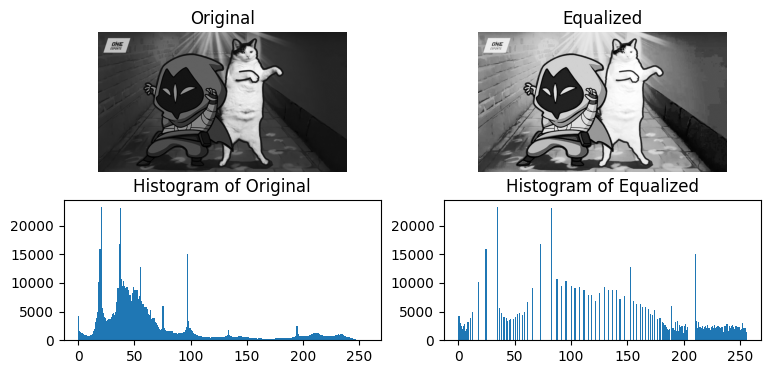

In [26]:
img = cv2.imread('../images/omen3.jpg', 0)

# Equalization toàn cục
equalized = cv2.equalizeHist(img)
plt.figure(figsize=(9, 4))
# So sánh
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(equalized, cmap='gray')
plt.axis("off");
plt.title('Equalized')

plt.subplot(2,2,3)
plt.hist(img.flatten(), bins=256, range=[0,256])
plt.title('Histogram of Original')

plt.subplot(2,2,4)
plt.hist(equalized.flatten(), bins=256, range=[0,256])
plt.title('Histogram of Equalized')
plt.show()

- Adaptive Histogram Equalization (CLAHE)

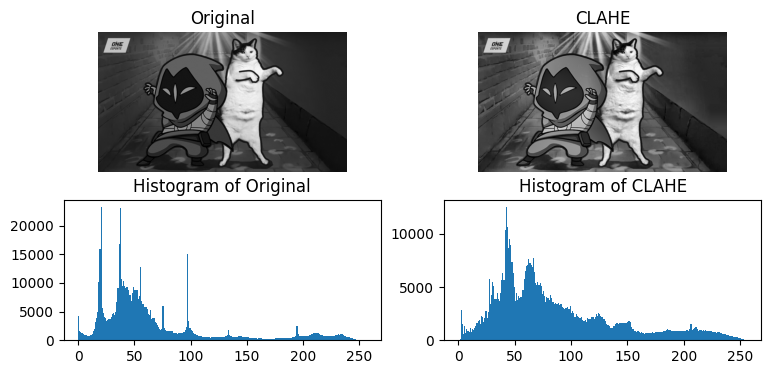

In [27]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)
plt.figure(figsize=(9, 4))
# So sánh
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(clahe_img, cmap='gray')
plt.axis("off");
plt.title('CLAHE')

plt.subplot(2,2,3)
plt.hist(img.flatten(), bins=256, range=[0,256])
plt.title('Histogram of Original')

plt.subplot(2,2,4)
plt.hist(clahe_img.flatten(), bins=256, range=[0,256])
plt.title('Histogram of CLAHE')
plt.show()

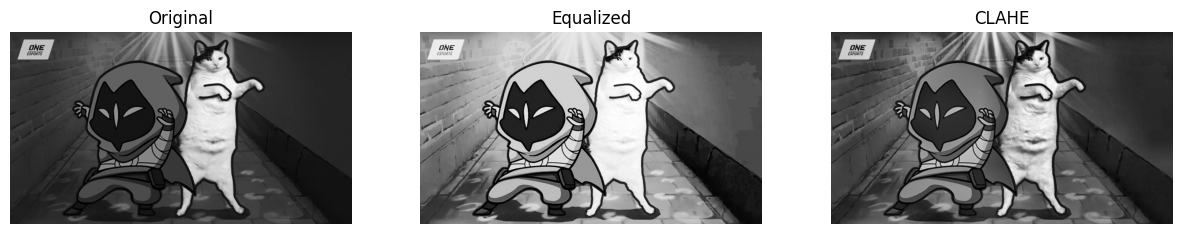

In [28]:
# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

# So sánh kết quả
titles = ['Original', 'Equalized', 'CLAHE']
images = [img, equalized, clahe_img]
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


Đánh giá tổng quan: 
Equalization toàn cục -> Ảnh bị làm cho cháy vùng sáng, còn vùng tối vẫn mờ.
CLAHE -> vùng sáng giữ chi tiết, còn vùng tối được làm rõ hơn.

Đánh giá: Hai ảnh gần như giống nhau, không có sự khác biệt

# 2. Tự tạo hàm cân bằng Histogram.

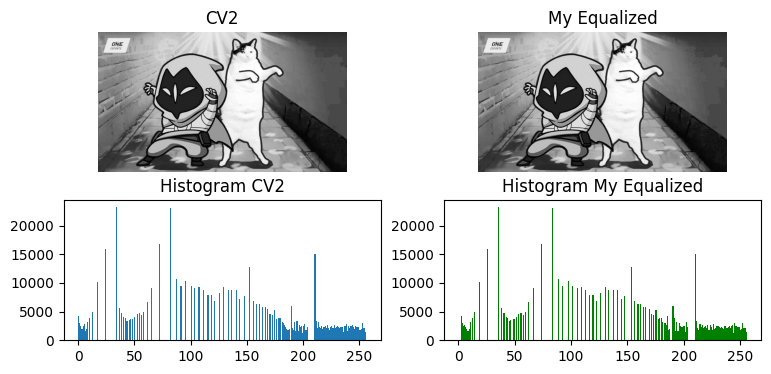

In [29]:
img = cv2.imread('../images/omen3.jpg', 0)

# BƯỚC 1: Tính PDF
def cal_pdf(img):
    hist = np.bincount(img.flatten(), minlength=256)
    pdf = hist / float(img.size)
    return pdf

# BƯỚC 2: Tính CDF
def cal_cdf(pdf):
    cdf = np.cumsum(pdf)
    return cdf

# BƯỚC 3: Tạo hàm biến đổi và áp dụng
def apply_histogram_equalization(img):
    pdf = cal_pdf(img)
    cdf = cal_cdf(pdf)
    
    # Ánh xạ mức xám mới: T(x) = round((L-1) * CDF(x))
    L = 256
    transform_map = np.round((L - 1) * cdf).astype(np.uint8)
    
    # Dùng ánh xạ để tạo ảnh mới
    equalized_img = transform_map[img]
    return equalized_img

# Áp dụng HE thủ công
equalized_img = apply_histogram_equalization(img)

# Hiển thị kết quả
plt.figure(figsize=(9, 4))
plt.subplot(2,2,1)
plt.imshow(equalized, cmap='gray')
plt.axis("off")
plt.title('CV2')

plt.subplot(2,2,2)
plt.imshow(equalized_img, cmap='gray')
plt.axis("off");
plt.title('My Equalized')

plt.subplot(2,2,3)
plt.hist(equalized.flatten(), bins=256, range=[0,256])
plt.title('Histogram CV2')

plt.subplot(2,2,4)
plt.hist(equalized_img.flatten(), bins=256, range=[0,256], color = 'green')
plt.title('Histogram My Equalized')

plt.show()


# 3. Ứng dụng trong ảnh y tế, vệ tinh.

- Y tế

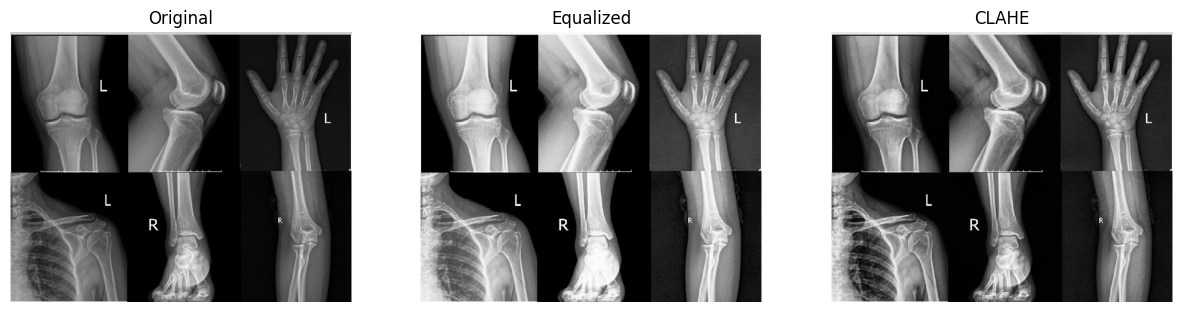

In [30]:
img = cv2.imread('../images/anhyte3.jpg', 0)

# Histogram Equalization 
equalized = cv2.equalizeHist(img)

# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

#So sánh
titles = ['Original', 'Equalized', 'CLAHE']
images = [img, equalized, clahe_img]
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

- Vệ tinh

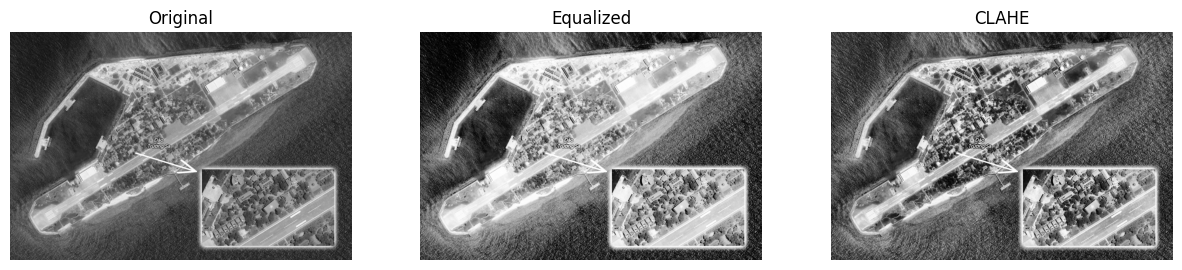

In [31]:
img = cv2.imread('../images/anhvetinh2.webp', 0)

# Histogram Equalization 
equalized = cv2.equalizeHist(img)

# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

#So sánh
titles = ['Original', 'Equalized', 'CLAHE']
images = [img, equalized, clahe_img]
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

# 4. Thực hiện CLAHE và so sánh kết quả

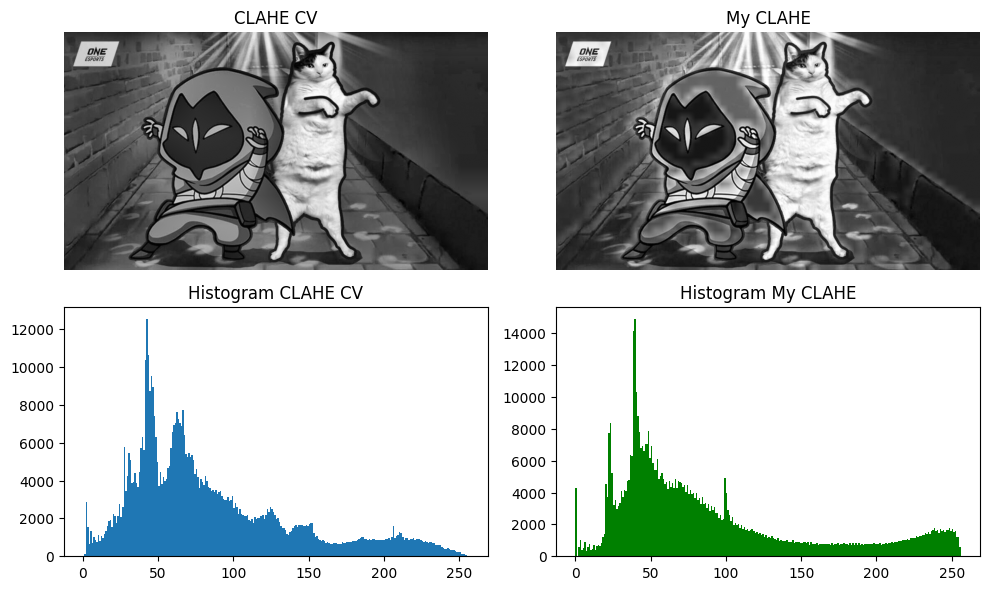

In [32]:
img = cv2.imread('../images/omen3.jpg', 0)

### HE thủ công ###
def cal_pdf(img):
    hist = np.bincount(img.flatten(), minlength=256)
    pdf = hist / float(img.size)
    return pdf

def cal_cdf(pdf):
    return np.cumsum(pdf)

def apply_histogram_equalization(img):
    pdf = cal_pdf(img)
    cdf = cal_cdf(pdf)
    L = 256
    transform_map = np.round((L - 1) * cdf).astype(np.uint8)
    return transform_map[img]

### CLAHE thủ công tối ưu ###
def clahe_manual(img, tile_size=16, clip_limit_ratio=0.008):
    h, w = img.shape
    L = 256

    n_tiles_y = (h + tile_size - 1) // tile_size
    n_tiles_x = (w + tile_size - 1) // tile_size

    pad_h = n_tiles_y * tile_size - h
    pad_w = n_tiles_x * tile_size - w
    img_padded = cv2.copyMakeBorder(img, 0, pad_h, 0, pad_w, cv2.BORDER_REFLECT)

    h_pad, w_pad = img_padded.shape
    result = np.zeros_like(img_padded)
    lut_tiles = np.zeros((n_tiles_y, n_tiles_x, L), dtype=np.uint8)

    for i in range(n_tiles_y):
        for j in range(n_tiles_x):
            y0, y1 = i * tile_size, (i + 1) * tile_size
            x0, x1 = j * tile_size, (j + 1) * tile_size
            tile = img_padded[y0:y1, x0:x1]

            hist = np.bincount(tile.flatten(), minlength=L)

            clip_limit = max(int(clip_limit_ratio * tile.size), 1)
            excess = np.maximum(hist - clip_limit, 0)
            total_excess = np.sum(excess)
            hist = np.minimum(hist, clip_limit)

            hist += total_excess // L
            hist[:total_excess % L] += 1

            # Chuẩn hóa an toàn
            cdf = np.cumsum(hist).astype(np.float32)
            cdf = (cdf - cdf[0]) / (cdf[-1] - cdf[0] + 1e-6)

            lut = np.round(cdf * (L - 1)).astype(np.uint8)
            lut_tiles[i, j] = lut

    for i in range(h_pad):
        for j in range(w_pad):
            ty, tx = i // tile_size, j // tile_size
            dy, dx = (i % tile_size) / tile_size, (j % tile_size) / tile_size

            ty1 = min(ty + 1, n_tiles_y - 1)
            tx1 = min(tx + 1, n_tiles_x - 1)

            val = img_padded[i, j]
            tl = lut_tiles[ty, tx][val]
            tr = lut_tiles[ty, tx1][val]
            bl = lut_tiles[ty1, tx][val]
            br = lut_tiles[ty1, tx1][val]

            top = (1 - dx) * tl + dx * tr
            bottom = (1 - dx) * bl + dx * br
            interpolated = (1 - dy) * top + dy * bottom
            result[i, j] = int(np.round(interpolated))

    return result[:h, :w]

# Áp dụng các phương pháp
img_he = apply_histogram_equalization(img)
my_clahe = clahe_manual(img, tile_size=16, clip_limit_ratio=0.008)

# CLAHE OpenCV
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_cv = clahe.apply(img)

# Hiển thị kết quả
plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
plt.imshow(clahe_cv, cmap='gray')
plt.axis("off")
plt.title('CLAHE CV')

plt.subplot(2,2,2)
plt.imshow(my_clahe, cmap='gray')
plt.axis("off")
plt.title('My CLAHE')

plt.subplot(2,2,3)
plt.hist(clahe_cv.flatten(), bins=256, range=[0,256])
plt.title('Histogram CLAHE CV')

plt.subplot(2,2,4)
plt.hist(my_clahe.flatten(), bins=256, range=[0,256], color='green')
plt.title('Histogram My CLAHE')

plt.tight_layout()
plt.show()
